### Load Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

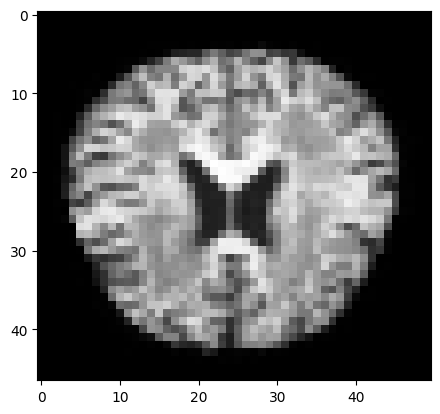

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [2]:
data_file = "C:/Users/afrod/Documents/Neural_Networks/MergedDataset"
classes = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]

for dementia_level in classes:
    path = os.path.join(data_file, dementia_level)
    for img in os.listdir(path):
        # Convert to grayscale for smaller array dimensions
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        final_array = cv2.resize(img_array, (int(200/4),int(190/4)))
        plt.imshow(final_array, cmap='gray')
        plt.show()
        print(img_array)
        break
    break


In [ ]:
training_data = []

def create_training_data():
    for dementia_level in classes:
        path = os.path.join(data_file, dementia_level)
        class_num = classes.index(dementia_level)
        for img in os.listdir(path):
            # Convert to grayscale for smaller array dimensions
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            final_array = cv2.resize(img_array, (200,190))
            training_data.append([final_array, class_num])
    random.shuffle(training_data)

create_training_data()

In [ ]:
print(len(training_data))

# Checking the shuffling
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

40384
0
1
2
1
1
0
3
0
1
0


In [ ]:
# Separating features and labels
# Images are also flattened to be used as input in the knn algorithm
X = np.array([features for features, _ in training_data]).reshape(-1, 200*190)
y = np.array([label for _, label in training_data])

print(len(X[0]))

2350


In [5]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("Test size:", len(X_test))
print("Train size:", len(X_train))

Test size: 16154
Train size: 24230


In [6]:
# Initializing classifiers
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)
centroid_clf = NearestCentroid()

### KNN with 1 Neighbour

In [7]:
knn_1.fit(X_train, y_train)
y_pred_knn1 = knn_1.predict(X_test)

print("KNN with 1 Neighbor:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn1))
print("Classification Report:\n", classification_report(y_test, y_pred_knn1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn1))

MemoryError: Unable to allocate 1.00 GiB for an array with shape (5539, 24230) and data type float64

### KNN with 3 Neighbours

In [ ]:
knn_3.fit(X_train, y_train)
y_pred_knn3 = knn_3.predict(X_test)

print("\nKNN with 3 Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn3))
print("Classification Report:\n", classification_report(y_test, y_pred_knn3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn3))


KNN with 3 Neighbors:
Accuracy: 0.79175436424415
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80      5132
           1       0.79      0.75      0.77      4477
           2       0.88      0.68      0.77      3953
           3       0.86      0.82      0.84      2592

    accuracy                           0.79     16154
   macro avg       0.81      0.79      0.80     16154
weighted avg       0.80      0.79      0.79     16154

Confusion Matrix:
 [[4604  335  118   75]
 [ 840 3344  187  106]
 [ 672  422 2704  155]
 [ 242  157   55 2138]]


### Nearest Centroid

In [ ]:
centroid_clf.fit(X_train, y_train)
y_pred_centroid = centroid_clf.predict(X_test)

print("\nNearest Centroid:")
print("Accuracy:", accuracy_score(y_test, y_pred_centroid))
print("Classification Report:\n", classification_report(y_test, y_pred_centroid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_centroid))


Nearest Centroid:
Accuracy: 0.4325244521480748
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.64      0.54      5132
           1       0.36      0.16      0.22      4477
           2       0.39      0.50      0.44      3953
           3       0.50      0.39      0.44      2592

    accuracy                           0.43     16154
   macro avg       0.43      0.42      0.41     16154
weighted avg       0.42      0.43      0.41     16154

Confusion Matrix:
 [[3263  591  993  285]
 [1909  730 1445  393]
 [1034  596 1982  341]
 [ 779  101  700 1012]]
